In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the adjusted dataset
df = pd.read_csv("premier_league_adjusted.csv")

#### Best overall win percentage at home and away

In [5]:
# Define a function to calculate win percentage
def calculate_win_percentage(outcomes):
    total_matches = len(outcomes)
    wins = np.sum(outcomes == 'Win')
    win_percentage = (wins / total_matches) * 100
    return win_percentage

# Define a function to determine match outcome (win, loss, draw) based on score
def match_outcome(row):
    home_score, away_score = map(int, row['Score'].split('–'))  # Use en dash '–'
    if home_score > away_score:
        return 'Win'
    elif home_score < away_score:
        return 'Loss'
    else:
        return 'Draw'

# Apply the match outcome function to each row to create an 'Outcome' column
df['Outcome'] = df.apply(match_outcome, axis=1)

# Calculate win percentage at home for each team
home_win_percentage = df.groupby('Home_Team')['Outcome'].agg(calculate_win_percentage)

# Calculate win percentage away for each team
away_win_percentage = df.groupby('Away_Team')['Outcome'].agg(calculate_win_percentage)

# Find the team with the highest win percentage at home
best_home_team = home_win_percentage.idxmax()
best_home_win_percentage = home_win_percentage.max()

# Find the team with the highest win percentage away
best_away_team = away_win_percentage.idxmax()
best_away_win_percentage = away_win_percentage.max()

print(f"The team with the best overall win percentage at home is {best_home_team} with {best_home_win_percentage:.2f}%.")
print(f"The team with the best overall win percentage away is {best_away_team} with {best_away_win_percentage:.2f}%.")

The team with the best overall win percentage at home is Manchester City with 89.47%.
The team with the best overall win percentage away is Leeds United with 73.68%.


#### The correlation between a team's xG and their performance in terms of wins

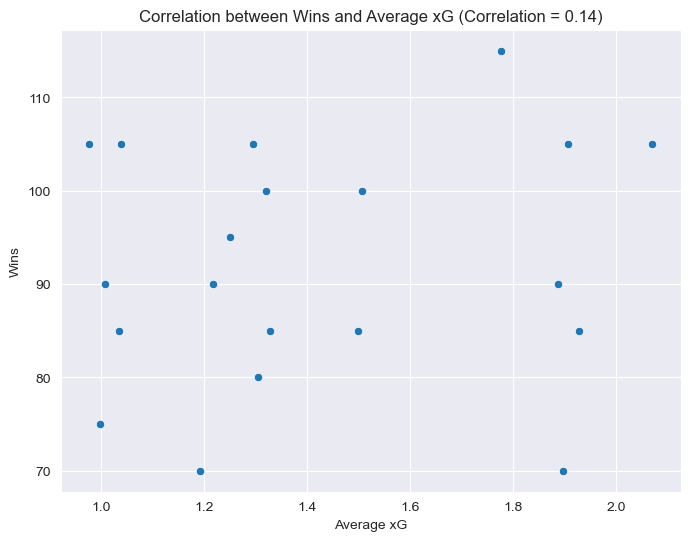

The Pearson correlation coefficient between Wins and Average xG is 0.14


In [7]:
# Calculate total wins for each team
total_wins = df[df['Outcome'] == 'Win'].groupby('Home_Team')['Outcome'].count() + df[df['Outcome'] == 'Win'].groupby('Away_Team')['Outcome'].count()
total_wins = total_wins.fillna(0).astype(int)

# Calculate the average xG for each team
avg_xg_home = df.groupby('Home_Team')['Home_xG'].mean()
avg_xg_away = df.groupby('Away_Team')['Away_xG'].mean()
avg_xg = (avg_xg_home + avg_xg_away) / 2

# Create a DataFrame to hold the data for analysis
team_performance = pd.DataFrame({'Wins': total_wins, 'Average xG': avg_xg})

# Calculate the Pearson correlation coefficient
correlation = team_performance['Wins'].corr(team_performance['Average xG'])

# Plot a scatterplot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=team_performance, x='Average xG', y='Wins')
plt.title(f'Correlation between Wins and Average xG (Correlation = {correlation:.2f})')
plt.xlabel('Average xG')
plt.ylabel('Wins')
plt.grid(True)
plt.show()

print(f"The Pearson correlation coefficient between Wins and Average xG is {correlation:.2f}")

#### The highest total xG over the last 5 seasons

In [8]:
# Calculate the total xG for each team (both home and away matches)
total_xg_home = df.groupby('Home_Team')['Home_xG'].sum()
total_xg_away = df.groupby('Away_Team')['Away_xG'].sum()
total_xg = total_xg_home + total_xg_away

# Find the team with the highest total xG
highest_total_xg_team = total_xg.idxmax()
highest_total_xg_value = total_xg.max()

print(f"The team with the highest total xG over the last 5 seasons is {highest_total_xg_team} with a total of {highest_total_xg_value:.2f} xG.")

The team with the highest total xG over the last 5 seasons is Manchester City with a total of 393.50 xG.
